<a href="https://colab.research.google.com/github/aero-surge/sih/blob/main/sih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob

In [ ]:
#The Satellite data has 954 * 298 pixels, 12 bands with the spectral resolution varying from 10 — 60 meters. The data can be downloaded using the below link.

In [ ]:
!pip install earthpy gdal

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 19.3 MB 92.7 MB/s 
     |████████████████████████████████| 1.0 MB 47.9 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 
     |████████████████████████████████| 16.7 MB 45.6 MB/s 


In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [ ]:
%cd /content/DATA SAT

[Errno 2] No such file or directory: '/content/DATA SAT'
/content


In [ ]:
S_sentinel_bands = glob("/content/DATA SAT/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
 '/content/DATA SAT/2020-01-27-00_00_2020-01-27-23_59_

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
    
arr_st = np.stack(l)

arr_st.shape

(12, 954, 298)

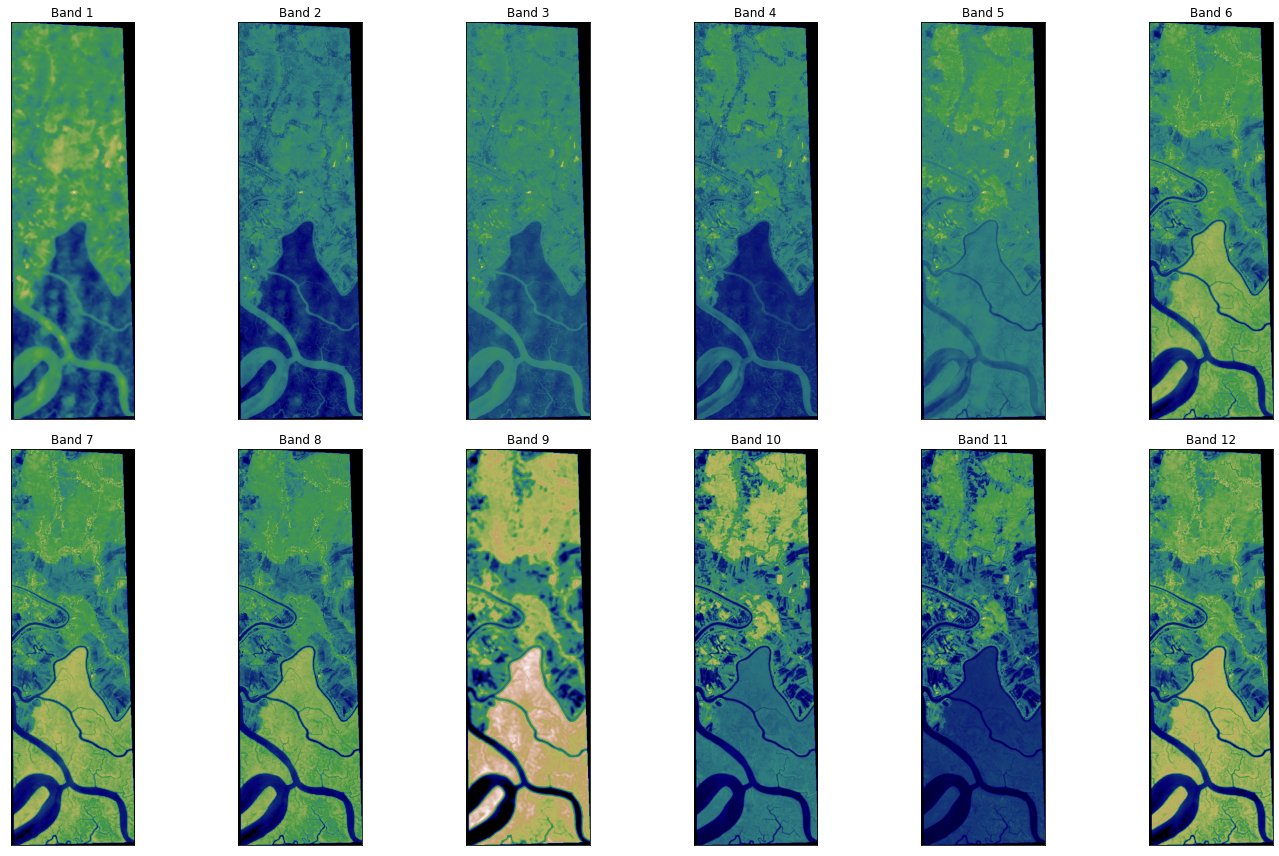

In [ ]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

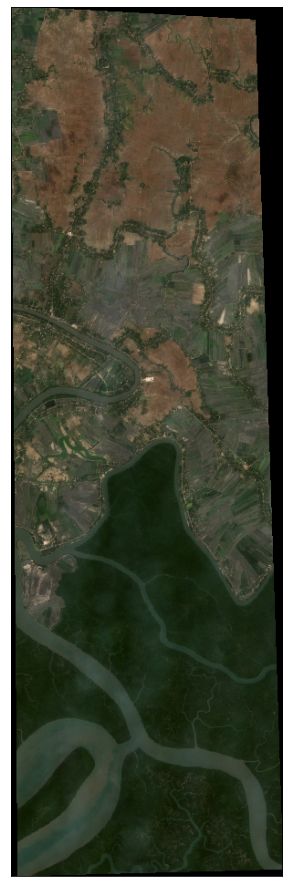

In [ ]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )
plt.show()

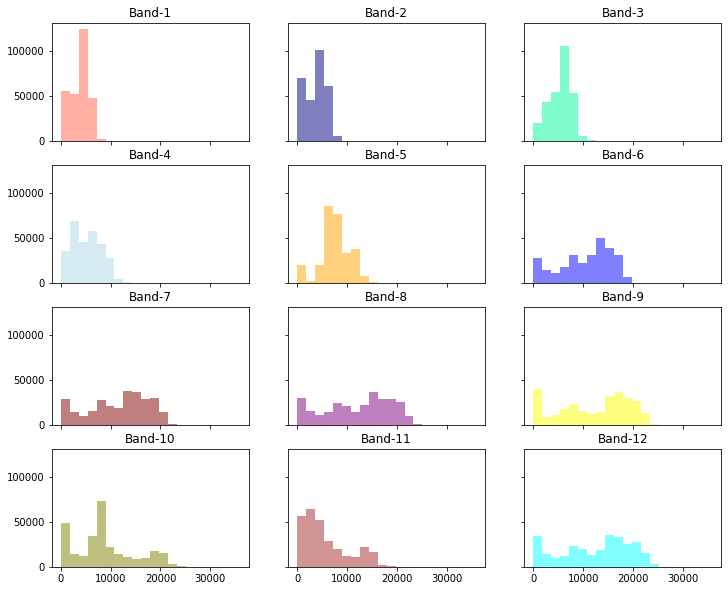

In [ ]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

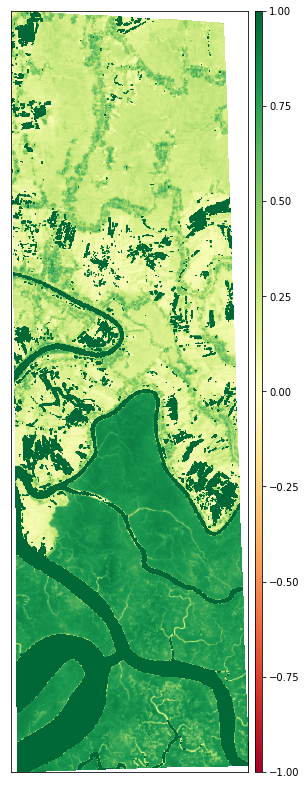

In [ ]:
# Normalized Difference Vegetation Index (NDVI)
#NDVI = ((NIR - Red)/(NIR + Red))

ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

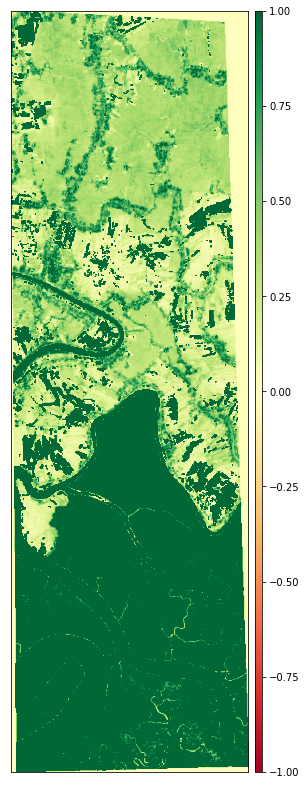

In [ ]:
#Soil-Adjusted Vegetation Index (SAVI)
#SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
L = 0.5
savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

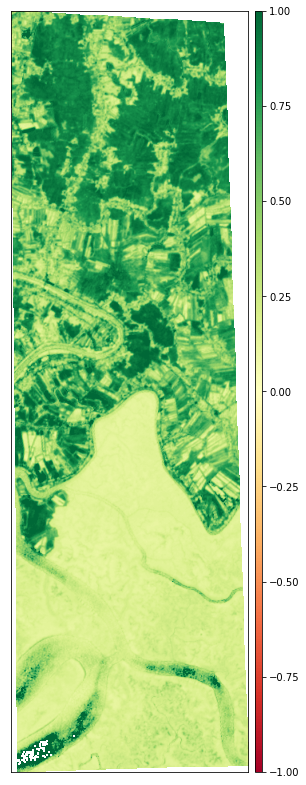

In [ ]:
#clay materials
cmr = np.divide(arr_st[10], arr_st[11])
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

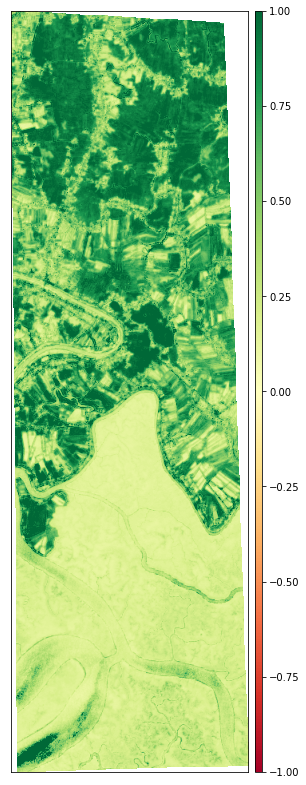

In [ ]:
# ferrous mterials
#Ferrous Minerals Ratio = SWIR / NIR

fmr = np.divide(arr_st[10], arr_st[7])
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()